# PCA for Dimensionality Reduction

Often, the desired goal is to reduce the dimensions of a $d$-dimensional dataset by projecting it onto a $k$-dimensional subspace (where $k<d$) in order to increase the computational efficiency while retaining most of the information. An important question is “what is the size of $k$ that represents the data ‘well’?”

## Summary of PCA approach

1. Standardize the data (centering and normalization)
2. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
3. Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k≤d$).
4. Construct the projection matrix $\mathbf{W}$ from the selected $k$ eigenvectors.
5. Transform the original dataset $\mathbf{X}$ via $\mathbf{W}$ to obtain a $k$-dimensional feature subspace $\mathbf{Y}$.

In [1]:
# prepare the iris dataset 
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

Explotory Visualization

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

<Figure size 800x600 with 4 Axes>

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $Σ$, which is a $d×d$ matrix where each element represents the covariance between two features. 

In [4]:
n, d = X_std.shape

cov_mat = 1/(n-1) * X_std.T.dot(X_std)
print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('\nEigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


As we can see that the correlation matrix yields the same eigdecomp compared to covariance matrix.

In [5]:
cor_mat = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


To summarize, We can clearly see that the following three approaches yield the same eigenvectors and eigenvalue pairs:

1. Eigendecomposition of the covariance matrix after standardizing the data.
2. Eigendecomposition of the correlation matrix.
3. Eigendecomposition of the correlation matrix after standardizing the data.

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [6]:
u,s,vt = np.linalg.svd(X_std)
vt.T

array([[ 0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [-0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

Sorting the eigenpairs

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.910818083752054
0.9212209307072242
0.14735327830509573
0.020607707235625678


After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [8]:
total = sum(eig_vals)
var_exp = [(pair[0]/total)*100 for pair in eig_pairs]
cum_exp = np.cumsum(var_exp)
cum_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

### Projection Matrix

Next we will talk about the construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our $d×k$-dimensional eigenvector matrix $\mathbf{W}$.

In this last step we will use the $4×2$-dimensional projection matrix $\mathbf{W}$ to transform our samples onto the new subspace via the equation
$\mathbf{Y}=\mathbf{X}\mathbf{W}$, where $\mathbf{Y}$ is a $150×2$ matrix of our transformed samples.

In [9]:
W = np.hstack((eig_pairs[0][1].reshape(d, 1), eig_pairs[1][1].reshape(d, 1)))
Y = X_std.dot(W)

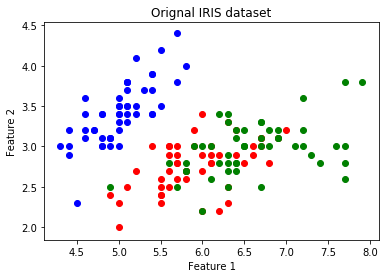

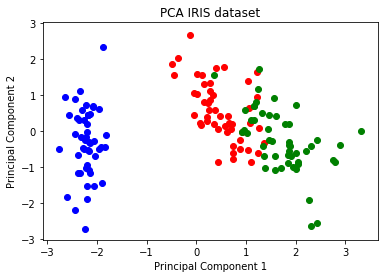

In [33]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('blue', 'red', 'green')):
    plt.scatter(X[y==lab, 0], X[y==lab, 1], label = lab, c = col)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Orignal IRIS dataset')
    
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('blue', 'red', 'green')):
    plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label = lab, c = col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA IRIS dataset')

### PCA using scikit-learn 

For educational purposes, we went a long way to apply the PCA to the Iris dataset. But luckily, there is already implementation in scikit-learn.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_r = pca.fit_transform(X_std)

In [36]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.72770452 0.23030523]


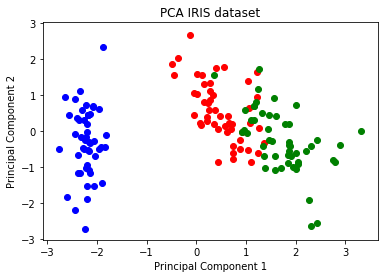

In [37]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('blue', 'red', 'green')):
    plt.scatter(X_r[y==lab, 0], -X_r[y==lab, 1], label = lab, c = col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA IRIS dataset')